<a href="https://colab.research.google.com/github/lozben/Puzzles/blob/main/EDA_goodreads_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loading the data as pandas_DataFrame

In [2]:
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/goodreads_train.csv')

Let's take a quick look at the data

In [3]:
train_data.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1


In [4]:
train_data.describe()

,book_id,rating,n_votes,n_comments
count,9.000000e+05,900000.000000,900000.000000,900000.000000
mean,1.344145e+07,3.689639,3.294381,1.016656
std,9.357863e+06,1.252583,17.873553,5.963821
min,1.000000e+00,0.000000,-3.000000,-1.000000
25%,6.340471e+06,3.000000,0.000000,0.000000
50%,1.344203e+07,4.000000,0.000000,0.000000
75%,2.057897e+07,5.000000,2.000000,0.000000
max,3.632868e+07,5.000000,3222.000000,1335.000000


We have 900,000 samples, each containing 10 distinct features and a corresponding label. Let's take a closer look at the features.

In [5]:
train_data.columns

Index(['user_id', 'book_id', 'review_id', 'rating', 'review_text',
       'date_added', 'date_updated', 'read_at', 'started_at', 'n_votes',
       'n_comments'],
      dtype='object')

Here, we have determined the following:

1. The ratings of the books are located in the 'rating' column.
2. The reviews are stored in the 'review_text' column.

This information is sufficient to begin building a model. However, before we proceed, let's explore the other data available and determine how it could aid in making predictions about the quality of the books.

Let's begin by examining the first column and analyzing the average rating given by users for the books.

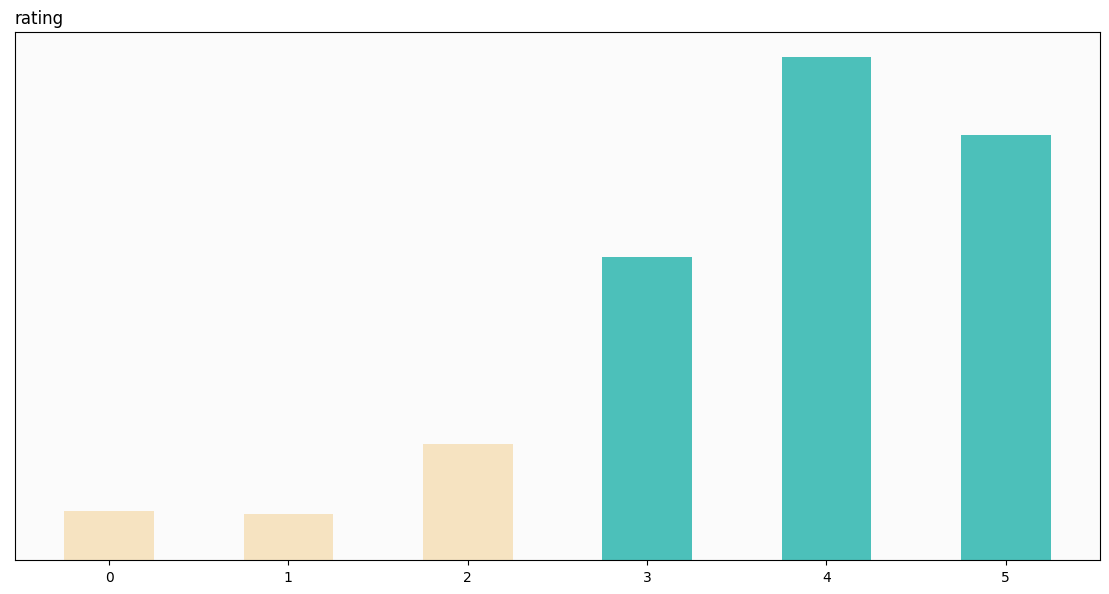

In [6]:
rating = []
target_cols = ['rating']
captions = []
for c in target_cols:
  rating.append(train_data[c].value_counts().sort_index())
  captions.append(c)

background_color = "#fbfbfb"
fig, axs = plt.subplots(1, 1, figsize=(14, 7), dpi=100)

for i, data in enumerate(rating):
  data.index = data.index.astype(str)
  rankn_val = data.nlargest(3).min()
  color_map =  np.array(['lightseagreen' ]*data.size)
  color_map[data<rankn_val] = 'wheat'
  color_map = list(color_map)
  
  ax = axs
  ax.bar(data.index.values, data.values, color=color_map, width=.5, alpha=0.8)
  
  ax.grid(visible=False)
  ax.set_yticks([])
  ax.set_title(captions[i], fontsize=12, loc='left')
    
  ax.set_facecolor(background_color) 



#     plt.suptitle('')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3) # useful for adjusting space between subplots
plt.show()  

In [7]:
table_mean_by_user = pd.pivot_table(train_data, values = 'rating', index=['user_id'],
                    aggfunc={'rating': 
                             [np.mean]})
table_mean_by_user

,mean
user_id,
000a1016fda6008d1edbba720ca00851,4.076923
000efb30c5236d7437c3cdf4bf3e4dc7,2.818182
0011e1a9112b3d798702ef5b20bbf35b,4.000000
0016a8010771c0c00c97f27dfc5cdd22,5.000000
0019de4561419b7543238e0979f2f33e,2.861538
...,...
fff3a250fbc018ad2c2c2d45c86734da,3.950000
fff7bfd82b89fa347edfe9a82ac0c61b,2.555556
fffc34d137f5c5c5e1ca1d6f325a4dcf,3.216667


Here we see that from 900,000 reviews only 12,188 authors are actively reading and writing. To think what else can we get from this: how many reviews has one user ever written. I will add this and mean rating by every user to the train_data.

In [8]:
train_data['user_freq'] = train_data.groupby('user_id')['user_id'].transform('count')

In [9]:
mean_ratings = train_data.groupby('user_id')['rating'].mean()
train_data['mean_rating_by_user'] = train_data['user_id'].transform(lambda x: mean_ratings[x])

In [10]:
train_data.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,user_freq,mean_rating_by_user
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1,83,4.084337
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0,83,4.084337
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0,83,4.084337
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1,83,4.084337
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1,83,4.084337


Now we see two additional columns 'user_freq' and 'mean_rating_by_user'. Let's do all the same with unique books.

In [11]:
table_mean_by_book = pd.pivot_table(train_data, values = 'rating', index=['book_id'],
                    aggfunc={'rating': 
                             [np.mean]})

In [12]:
table_mean_by_book

,mean
book_id,
1,4.571795
2,4.424390
3,4.521862
5,4.652083
6,4.587444
...,...
36196052,4.500000
36242916,3.000000
36252773,4.000000


It apears that we have only 25474 unique books

In [13]:
train_data['book_freq'] = train_data.groupby('book_id')['user_id'].transform('count')

In [14]:
mean_ratings_books = train_data.groupby('book_id')['rating'].mean()
train_data['mean_rating_by_book'] = train_data['book_id'].transform(lambda x: mean_ratings_books[x])

In [15]:
train_data.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,user_freq,mean_rating_by_user,book_freq,mean_rating_by_book
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1,83,4.084337,20,3.450000
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0,83,4.084337,54,3.555556
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0,83,4.084337,34,4.088235
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1,83,4.084337,116,3.439655
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1,83,4.084337,9,3.555556


Now let's compare rating distributions.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


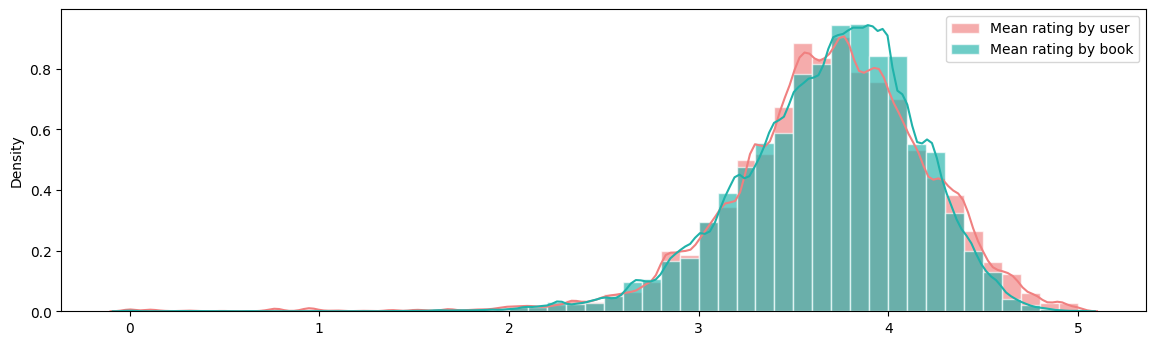

In [49]:
fig, axs = plt.subplots(1, 1, figsize=(14, 4), dpi=100)
captions = ['Mean rating by user',
            'Mean rating by book']
colors = ['lightcoral', 
          'lightseagreen']

for i, c in enumerate(['mean_rating_by_user', 'mean_rating_by_book']):
    ax = axs
    sns.distplot(train_data[c],color=colors[i],
                 hist_kws=dict(edgecolor="white", linewidth=1,alpha=0.65), 
                 ax=ax, label = captions[i])
    ax.grid(visible=False)

    #
    #ax.set_ylabel(data.name)
    #ax.set_yticks([])
    ax.set_xlabel('')
    #ax.set_title(captions[i], fontsize=12, loc='left')

    # ax.set_facecolor(background_color) 



#     plt.suptitle('')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None) # useful for adjusting space between subplots
plt.legend()
plt.show() 

Now it is interesting to look at disagreement among reviewers

In [17]:
std_by_book = train_data.groupby('book_id')['rating'].std(ddof=0)
train_data['rating_std_by_book'] = train_data['book_id'].transform(lambda x: std_by_book[x])

In [18]:
std_by_user = train_data.groupby('user_id')['rating'].std(ddof=0)
train_data['rating_std_by_user'] = train_data['user_id'].transform(lambda x: std_by_user[x])

In [19]:
train_data.describe()

,book_id,rating,n_votes,n_comments,user_freq,mean_rating_by_user,book_freq,mean_rating_by_book,rating_std_by_book,rating_std_by_user
count,9.000000e+05,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000
mean,1.344145e+07,3.689639,3.294381,1.016656,219.911636,3.689639,163.228738,3.689639,1.139673,1.101111
std,9.357863e+06,1.252583,17.873553,5.963821,220.304182,0.521532,237.622581,0.462452,0.237159,0.290724
min,1.000000e+00,0.000000,-3.000000,-1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.340471e+06,3.000000,0.000000,0.000000,76.000000,3.409836,27.000000,3.411471,0.998311,0.908129
50%,1.344203e+07,4.000000,0.000000,0.000000,155.000000,3.721271,68.000000,3.739130,1.145087,1.074888
75%,2.057897e+07,5.000000,2.000000,0.000000,286.000000,4.024691,184.000000,4.000000,1.287081,1.258215
max,3.632868e+07,5.000000,3222.000000,1335.000000,1815.000000,5.000000,1734.000000,5.000000,2.500000,2.500000


In [20]:
import string
import re


def count_words(sentence):
    sentence = re.sub("[%s]" % re.escape(string.punctuation), "", sentence.lower())
    sentence = re.sub("([^\x00-\x7F])+", " ", sentence)    
    sentence = sentence.replace('\n', ' ').replace('.', ' ').replace(',', ' ').replace('?', ' ')\
    .replace('\r', ' ').replace('!', ' ').replace('"\r', ' ').replace('"', ' ')\
    .replace("'", ' ').replace("''", ' ').replace('(', ' ').replace(')', ' ').replace(']', ' ')\
    .replace('-', ' ').replace('/', ' ').lower()
    words=list(set(sentence.split(' ')))
    if '' in words:
        words.remove('')   
    return [len(words), sentence]

In [21]:
num_words_clean_text = train_data['review_text'].apply(lambda x: count_words(x))

In [22]:
df = pd.DataFrame(num_words_clean_text.tolist())
df.columns = ['count_words', 'clean_text']

In [23]:
train_data['essay_len'] = train_data['review_text'].apply(lambda x: len(x))
(train_data['unique_words'], train_data['clean_text']) = df.count_words, df.clean_text

In [24]:
print('Max length of review: ', train_data.unique_words.max())
print('Mean length of review: ', train_data.unique_words.mean())

Max length of review:  1138
Mean length of review:  108.27976222222222


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


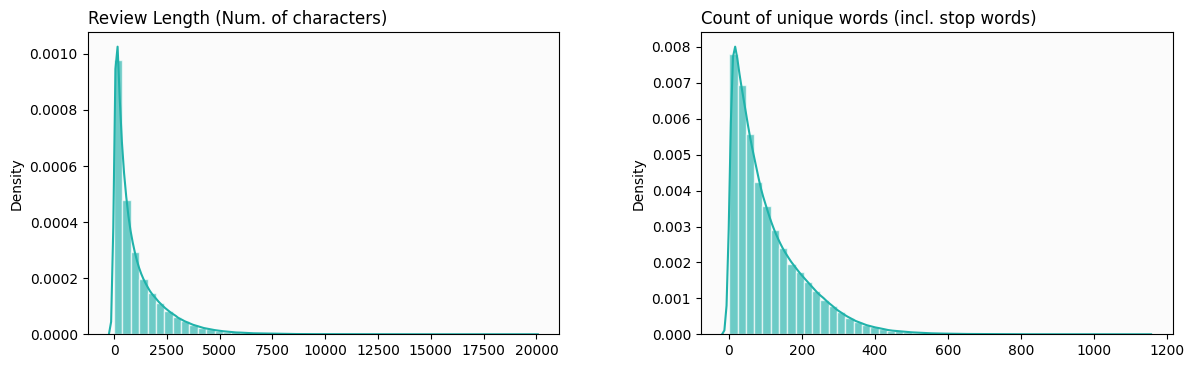

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(14, 4), dpi=100)
captions = ['Review Length (Num. of characters)',
            'Count of unique words (incl. stop words)']
for i, c in enumerate(['essay_len', 'unique_words']):
    ax = axs[i]
    sns.distplot(train_data[c],color='lightseagreen',
                 hist_kws=dict(edgecolor="white", linewidth=1,alpha=0.65), 
                 ax=ax)
    ax.grid(visible=False)

    #ax.set_ylabel(data.name)
    #ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_title(captions[i], fontsize=12, loc='left')

    ax.set_facecolor(background_color) 
    
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None) # useful for adjusting space between subplots
plt.show() 

In [26]:
target_cols = ['rating']
for c in target_cols:
    train_data[f'{c}_3class']='mediocre'
    train_data.loc[train_data[c]==4,f'{c}_3class']='good'
    train_data.loc[train_data[c]<=2,f'{c}_3class']='bad'

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

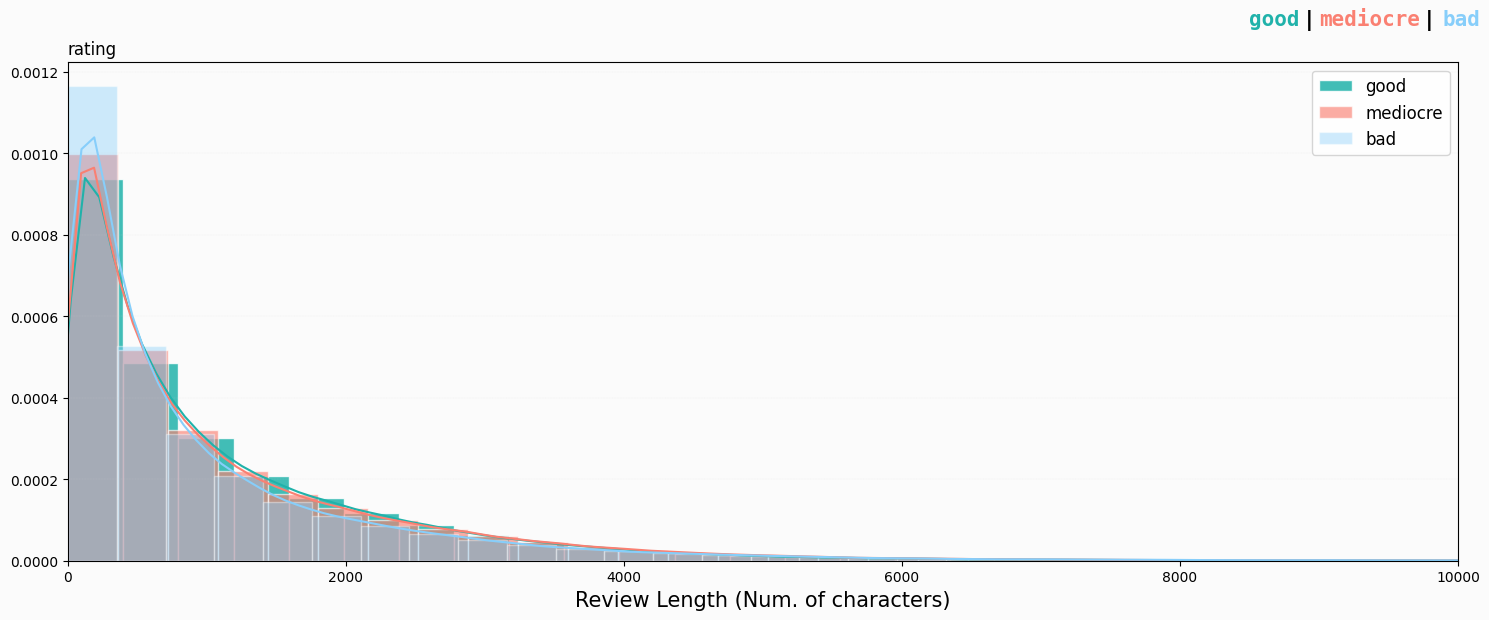

In [55]:
background_color = "#fbfbfb"
fig, axs = plt.subplots(1, 1, figsize=(15, 6), sharex=True, sharey=True, dpi=100,facecolor=background_color)


i = 0
    
for i, c in enumerate(target_cols):
    ax = axs

    sns.distplot(train_data.loc[train_data[f'{c}_3class']=='good', 'essay_len'], ax=ax,color="lightseagreen", label="good",hist_kws=dict(edgecolor="white", linewidth=1,alpha=0.85), )
    sns.distplot(train_data.loc[train_data[f'{c}_3class']=='mediocre', 'essay_len'], ax=ax,color="salmon", label="mediocre",hist_kws=dict(edgecolor="white", linewidth=1,alpha=0.65), )
    sns.distplot(train_data.loc[train_data[f'{c}_3class']=='bad', 'essay_len'], ax=ax,color="lightskyblue",label="bad", hist_kws=dict(edgecolor="white", linewidth=1,alpha=0.4), )
    ax.yaxis.grid(color='lightgray', linestyle='dashed')
    ax.grid(visible=True, which='major', axis='y', color='lightgray', zorder=0, linestyle=':', linewidth=0.2)

    ax.set_ylabel('')
    ax.set_facecolor(background_color)
#     ax.set_yticks(range(0, 201, 40))   
#     ax.set_ylim(0, 200)
#     ax.set_xticks(range(0, 13, 1))   
    ax.set_xlim(0, 10000)
    ax.set_xlabel('Review Length (Num. of characters)', fontsize = 15)
    ax.set_title(c, loc='left')
    ax.set_facecolor(background_color)
    i = i + 1
        




fig.text(.87, 1, 'good', color="lightseagreen",fontweight='bold', fontfamily='monospace', fontsize=15,ha='right')  
fig.text(.88, 1, '|',fontweight='bold', fontfamily='monospace', fontsize=15,ha='right')  
fig.text(.95, 1, 'mediocre', color="salmon",fontweight='bold', fontfamily='monospace', fontsize=15,ha='right')  
fig.text(.96, 1, '|',fontweight='bold', fontfamily='monospace', fontsize=15,ha='right')  
fig.text(.99, 1, 'bad', color="lightskyblue",fontweight='bold', fontfamily='monospace', fontsize=15,ha='right')  

plt.tight_layout()
plt.legend(fontsize = 12)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2) # useful for adjusting space between subplots
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

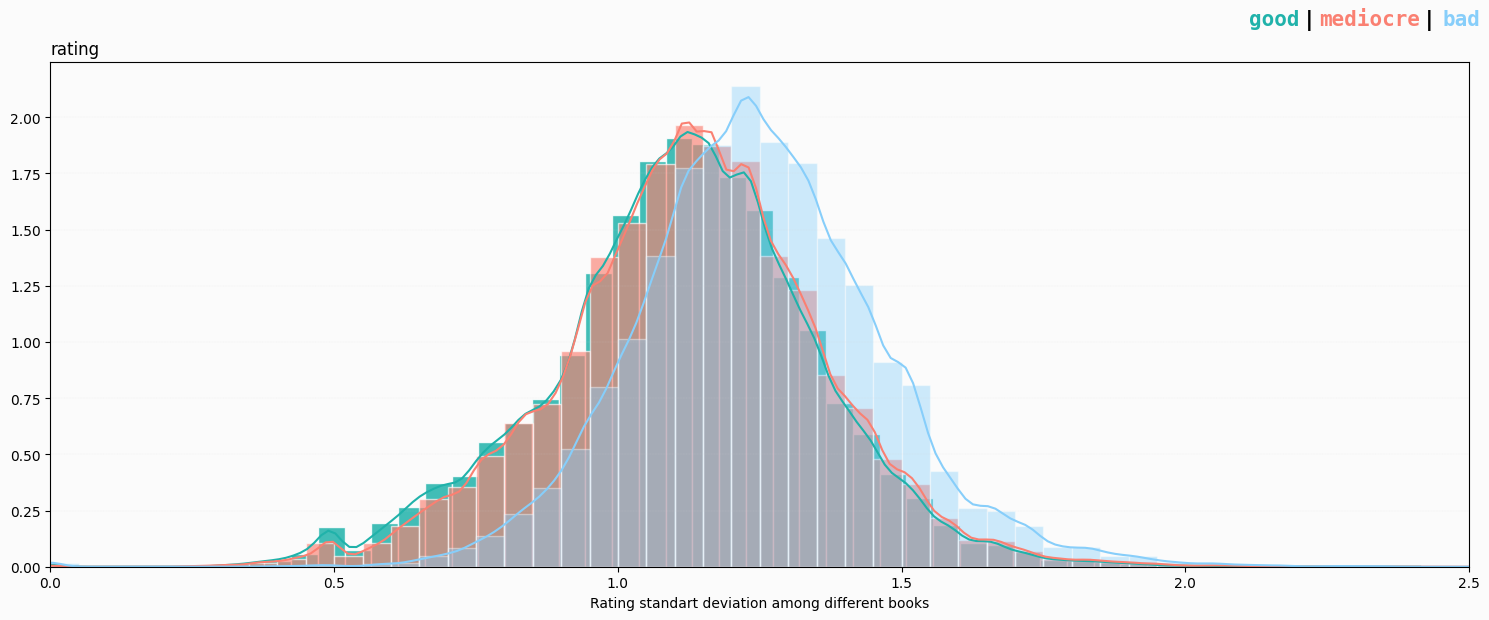

In [38]:
background_color = "#fbfbfb"
fig, axs = plt.subplots(1, 1, figsize=(15, 6), sharex=True, sharey=True, dpi=100,facecolor=background_color)


i = 0
    
for i, c in enumerate(target_cols):
    ax = axs

    sns.distplot(train_data.loc[train_data[f'{c}_3class']=='good', 'rating_std_by_book'], ax=ax,color="lightseagreen", label="good",hist_kws=dict(edgecolor="white", linewidth=1,alpha=0.85), )
    sns.distplot(train_data.loc[train_data[f'{c}_3class']=='mediocre', 'rating_std_by_book'], ax=ax,color="salmon", label="mediocre",hist_kws=dict(edgecolor="white", linewidth=1,alpha=0.65), )
    sns.distplot(train_data.loc[train_data[f'{c}_3class']=='bad', 'rating_std_by_book'], ax=ax,color="lightskyblue",label="bad", hist_kws=dict(edgecolor="white", linewidth=1,alpha=0.4), )
    ax.yaxis.grid(color='lightgray', linestyle='dashed')
    ax.grid(visible=True, which='major', axis='y', color='lightgray', zorder=0, linestyle=':', linewidth=0.2)

    ax.set_ylabel('')
    ax.set_facecolor(background_color)
#     ax.set_yticks(range(0, 201, 40))   
    ax.set_xlim(0, 2.5)
#     ax.set_xticks(range(0, 13, 1))   
    #ax.set_xlim(0, 4000)
    ax.set_xlabel('Rating standart deviation among different books')
    ax.set_title(c, loc='left')
    ax.set_facecolor(background_color)
    i = i + 1
        




fig.text(.87, 1, 'good', color="lightseagreen",fontweight='bold', fontfamily='monospace', fontsize=15,ha='right')  
fig.text(.88, 1, '|',fontweight='bold', fontfamily='monospace', fontsize=15,ha='right')  
fig.text(.95, 1, 'mediocre', color="salmon",fontweight='bold', fontfamily='monospace', fontsize=15,ha='right')  
fig.text(.96, 1, '|',fontweight='bold', fontfamily='monospace', fontsize=15,ha='right')  
fig.text(.99, 1, 'bad', color="lightskyblue",fontweight='bold', fontfamily='monospace', fontsize=15,ha='right')  

plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2) # useful for adjusting space between subplots
plt.show()

In [39]:
train_data = train_data.drop(['user_id', 'date_added', 'date_updated', 'read_at', 'started_at'], axis = 1)

In [42]:
import nltk
from tqdm import tqdm
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def generate_sentiment_scores(data):
    sid = SentimentIntensityAnalyzer()
    neg=[]
    pos=[]
    neu=[]
    comp=[]
    for sentence in tqdm(data['clean_text'].values): 
        sentence_sentiment_score = sid.polarity_scores(sentence)
        comp.append(sentence_sentiment_score['compound'])
        neg.append(sentence_sentiment_score['neg'])
        pos.append(sentence_sentiment_score['pos'])
        neu.append(sentence_sentiment_score['neu'])
    return comp,neg,pos,neu
train_data['compound'],train_data['negative'],train_data['positive'],train_data['neutral']=generate_sentiment_scores(train_data)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
100%|██████████| 900000/900000 [37:28<00:00, 400.33it/s]


In [43]:
train_data

,book_id,review_id,rating,review_text,n_votes,n_comments,user_freq,mean_rating_by_user,book_freq,mean_rating_by_book,rating_std_by_book,rating_std_by_user,essay_len,unique_words,clean_text,rating_3class,compound,negative,positive,neutral
0,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,28,1,83,4.084337,20,3.450000,1.023474,1.319043,2119,212,this is a special book it started slow for abo...,mediocre,0.5927,0.094,0.117,0.789
1,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,1,0,83,4.084337,54,3.555556,1.448712,1.319043,93,10,recommended by don katz avail for free in dece...,mediocre,0.6249,0.000,0.389,0.611
2,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",22,0,83,4.084337,34,4.088235,0.919324,1.319043,2598,236,a fun fast paced science fiction thriller i re...,mediocre,0.8626,0.091,0.123,0.786
3,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,5,1,83,4.084337,116,3.439655,1.176558,1.319043,153,19,recommended reading to understand what is goin...,bad,0.8126,0.000,0.344,0.656
4,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",9,1,83,4.084337,9,3.555556,0.831479,1.319043,4044,308,i really enjoyed this book and there is a lot ...,good,0.9925,0.097,0.137,0.767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899995,11832081,7c34c15ad8cb28a4afca32946e2016ea,3,3.5 stars. \n Jenna is a popular YA author and...,0,0,42,4.190476,19,3.789474,0.893188,0.879342,517,70,35 stars jenna is a popular ya author and he...,mediocre,0.9716,0.000,0.216,0.784
899996,16095092,e979c735276431915d089cfaf446d64f,3,This was a quick read for me. I have read a lo...,1,1,42,4.190476,9,2.555556,0.955814,0.879342,553,79,this was a quick read for me i have read a lot...,mediocre,-0.8155,0.184,0.109,0.708
899997,8430896,feb9fe6439f9fbba8a1cce36020ad977,4,** spoiler alert ** \n 3.5 stars. \n This book...,1,0,42,4.190476,9,3.444444,1.422916,0.879342,1844,188,spoiler alert 35 stars this book is swee...,good,0.9923,0.105,0.212,0.683
899998,12275680,741e29369f70531bfffbd02add86f228,4,** spoiler alert ** \n Another fun read from M...,0,0,42,4.190476,39,3.307692,0.721602,0.879342,1302,148,spoiler alert another fun read from ms eva...,good,0.9978,0.038,0.304,0.658


In [44]:
corr_matrix = train_data.corr()

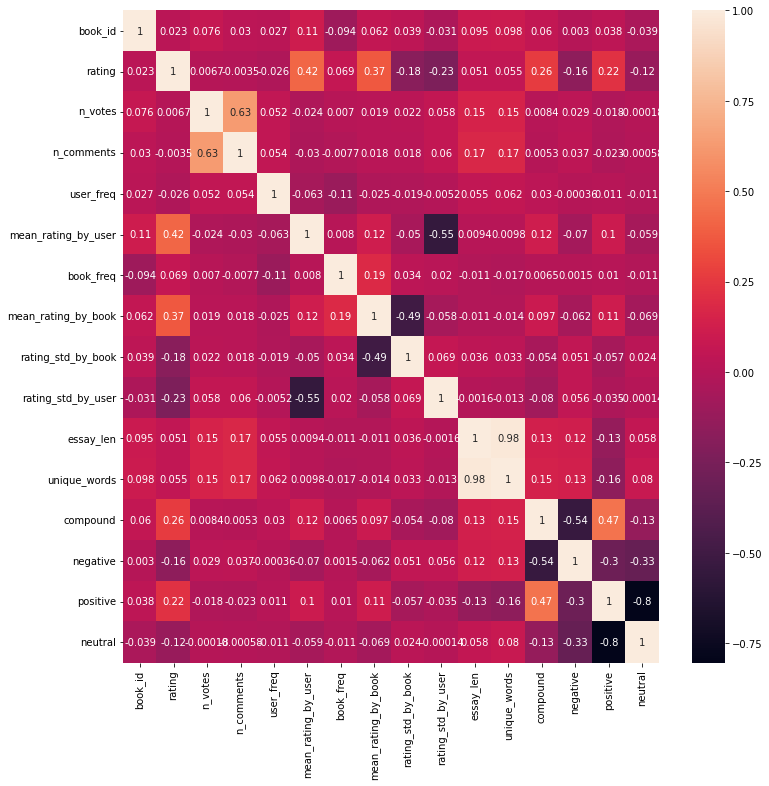

In [47]:
fig, ax = plt.subplots(figsize=(12,12))   
sns.heatmap(corr_matrix, annot=True, ax=ax)